<div class="">
<br><br>
<center><br><font size="6"><font face="calibri"><strong>Dataset by UCI Machine Learning
<center><br><font size="5"><font face="calibri"><strong>
<br><br>
<br>
<br><strong>Bella Putri
<br><strong>09011281722059

In [60]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.utils import resample
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
scaler = MinMaxScaler
from keras.optimizers import Adam
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### IMPORT PACKAGES 
Berikut ini adalah paket-paket yang digunakan antara lain :

Keras Applications adalah salah satu modul dalam pustaka Keras yang menyediakan arsitektur berbagai model Deep Learning ternama. Model-model itu sudah dilatih out of the box. Dengan kata lain, menggunakan Keras Applications sama halnya membuat sistem cerdas.

Paket sklearn.utils

Paket sklearn.preprocessing menyediakan beberapa fungsi utilitas umum dan kelas transformator untuk mengubah vektor fitur mentah menjadi representasi yang lebih sesuai untuk downstream estimator. Dalam hali ini diimportkan StandardScaler dan MinMaxScaler.

NumPy adalah paket dasar untuk komputasi ilmiah dengan Python. NumPy juga dapat digunakan sebagai wadah data generik multidimensi yang efisien. Hal ini memungkinkan NumPy untuk terintegrasi dengan mudah dan cepat dengan berbagai macam database.

Pandas merupakan toolkit yang powerfull sebagai alat analisis data dan struktur untuk bahasa pemrograman Python. 

Seaborn adalah library untuk membuat grafik statistik dengan Python. Ini dibangun di atas matplotlib dan terintegrasi dengan struktur data pandas.

Matplotlib.pyplot berungsi untuk membuat suatu gambar, membuat sebuah plotting area pada gambar, membuat garis pada plotting area, dan-lain-lain.

In [61]:
dataset = pd.read_csv ("r2data.csv")

In [62]:
df = pd.DataFrame(dataset)

In [290]:
feature = np.array(dataset.ix[:,0:9])
label = np.array(dataset.ix[:,9])

C:\Users\Bella Putri\AppData\Local\conda\conda\envs\tensorflow-session\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
C:\Users\Bella Putri\AppData\Local\conda\conda\envs\tensorflow-session\lib\site-packages\pandas\core\indexing.py:822: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  retval = getattr(retval, self.name)._getitem_axis(key, axis=i)
C:\Users\Bella Putri\AppData\Local\conda\conda\envs\tensorflow-session\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing

In [291]:
data = pd.DataFrame(feature)
data

,0,1,2,3,4,5,6,7,8
0,48.0,23.500000,70.0,2.707,0.467409,8.8071,9.702400,7.99585,417.114
1,83.0,20.690495,92.0,3.115,0.706897,8.8438,5.429285,4.06405,468.786
2,82.0,23.124670,91.0,4.498,1.009651,17.9393,22.432040,9.27715,554.697
3,68.0,21.367521,77.0,3.226,0.612725,9.8827,7.169560,12.76600,928.220
4,86.0,21.111111,92.0,3.549,0.805386,6.6994,4.819240,10.57635,773.920
...,...,...,...,...,...,...,...,...,...
111,45.0,26.850000,92.0,3.330,0.755688,54.6800,12.100000,10.96000,268.230
112,62.0,26.840000,100.0,4.530,1.117400,12.4500,21.420000,7.32000,330.160
113,65.0,32.050000,97.0,5.730,1.370998,61.4800,22.540000,10.33000,314.050
114,72.0,25.590000,82.0,2.820,0.570392,24.9600,33.750000,3.27000,392.460


In [292]:
dataset.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


In [293]:
dataset.describe()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
count,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000
mean,57.301724,27.582111,97.793103,10.012086,2.694988,26.615080,10.180874,14.725966,534.647000,1.551724
std,16.112766,5.020136,22.525162,10.067768,3.642043,19.183294,6.843341,12.390646,345.912663,0.499475
min,24.000000,18.370000,60.000000,2.432000,0.467409,4.311000,1.656020,3.210000,45.843000,1.000000
25%,45.000000,22.973205,85.750000,4.359250,0.917966,12.313675,5.474282,6.881763,269.978250,1.000000
50%,56.000000,27.662416,92.000000,5.924500,1.380939,20.271000,8.352692,10.827740,471.322500,2.000000
75%,71.000000,31.241442,102.000000,11.189250,2.857787,37.378300,11.815970,17.755207,700.085000,2.000000
max,89.000000,38.578759,201.000000,58.460000,25.050342,90.280000,38.040000,82.100000,1698.440000,2.000000


In [294]:
benign = dataset[dataset.Classification==1]

### ATTRIBUTE
Atribut yang terdapat berdasarkan Dataset adalah sebagai berikut : <br>

In [295]:
normal = dataset[dataset.Classification==0]
Dos = dataset[dataset.Classification==1]

Text(0, 0.5, 'Frequency')

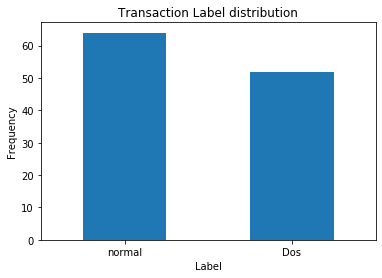

In [296]:
labels = ['normal','Dos']
classes = pd.value_counts(df['Classification'], sort = True)
classes.plot(kind = 'bar', rot=0)
plt.title("Transaction Label distribution")
plt.xticks(range(2), labels)
plt.xlabel("Label")
plt.ylabel("Frequency")

### HISTOGRAM
Histogram adalah plot yang memungkinkan dapat menemukan dan menunjukkan distribusi frekuensi (bentuk) yang mendasari serangkaian data.

hist() befungsi untuk menemukan dan menunjukan distribusi frekuensi berdasarkan serangkaian data, dan plt.show() berfungsi untuk menampilkannya dalam bentuk grafik.

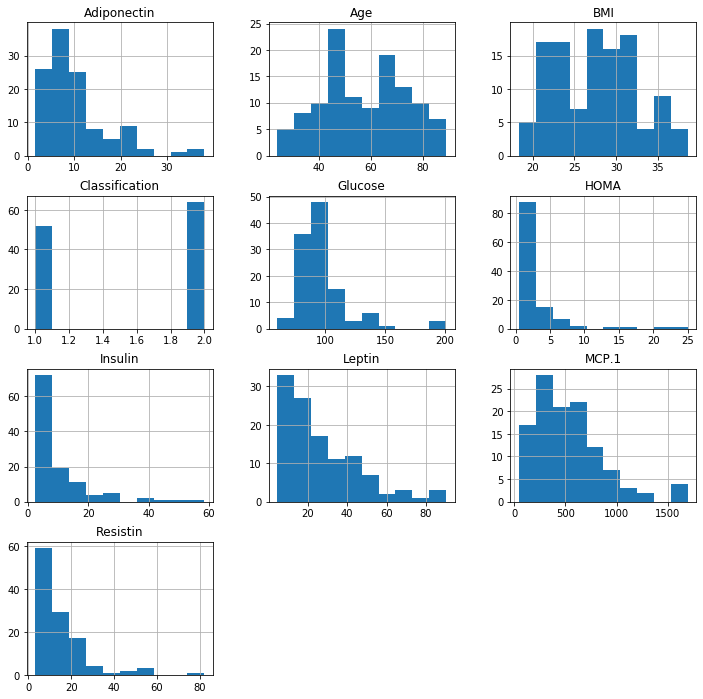

In [297]:
dataset.hist(figsize=(12,12))
plt.show()

### BOX PLOT
BoxPlot adalah penyajian grafis lainnya yang bisa merangkum informasi lebih detail mengenai distribusi nilai-nilai data pengamatan.Boxplot merupakan ringkasan distribusi sampel yang disajikan secara grafis yang bisa menggambarkan bentuk distribusi data (skewness), ukuran tendensi sentral dan ukuran penyebaran (keragaman) data pengamatan. 

Age                  AxesSubplot(0.125,0.826831;0.227941x0.053169)
BMI               AxesSubplot(0.398529,0.826831;0.227941x0.053169)
Glucose           AxesSubplot(0.672059,0.826831;0.227941x0.053169)
Insulin              AxesSubplot(0.125,0.763028;0.227941x0.053169)
HOMA              AxesSubplot(0.398529,0.763028;0.227941x0.053169)
Leptin            AxesSubplot(0.672059,0.763028;0.227941x0.053169)
Adiponectin          AxesSubplot(0.125,0.699225;0.227941x0.053169)
Resistin          AxesSubplot(0.398529,0.699225;0.227941x0.053169)
MCP.1             AxesSubplot(0.672059,0.699225;0.227941x0.053169)
Classification       AxesSubplot(0.125,0.635423;0.227941x0.053169)
dtype: object

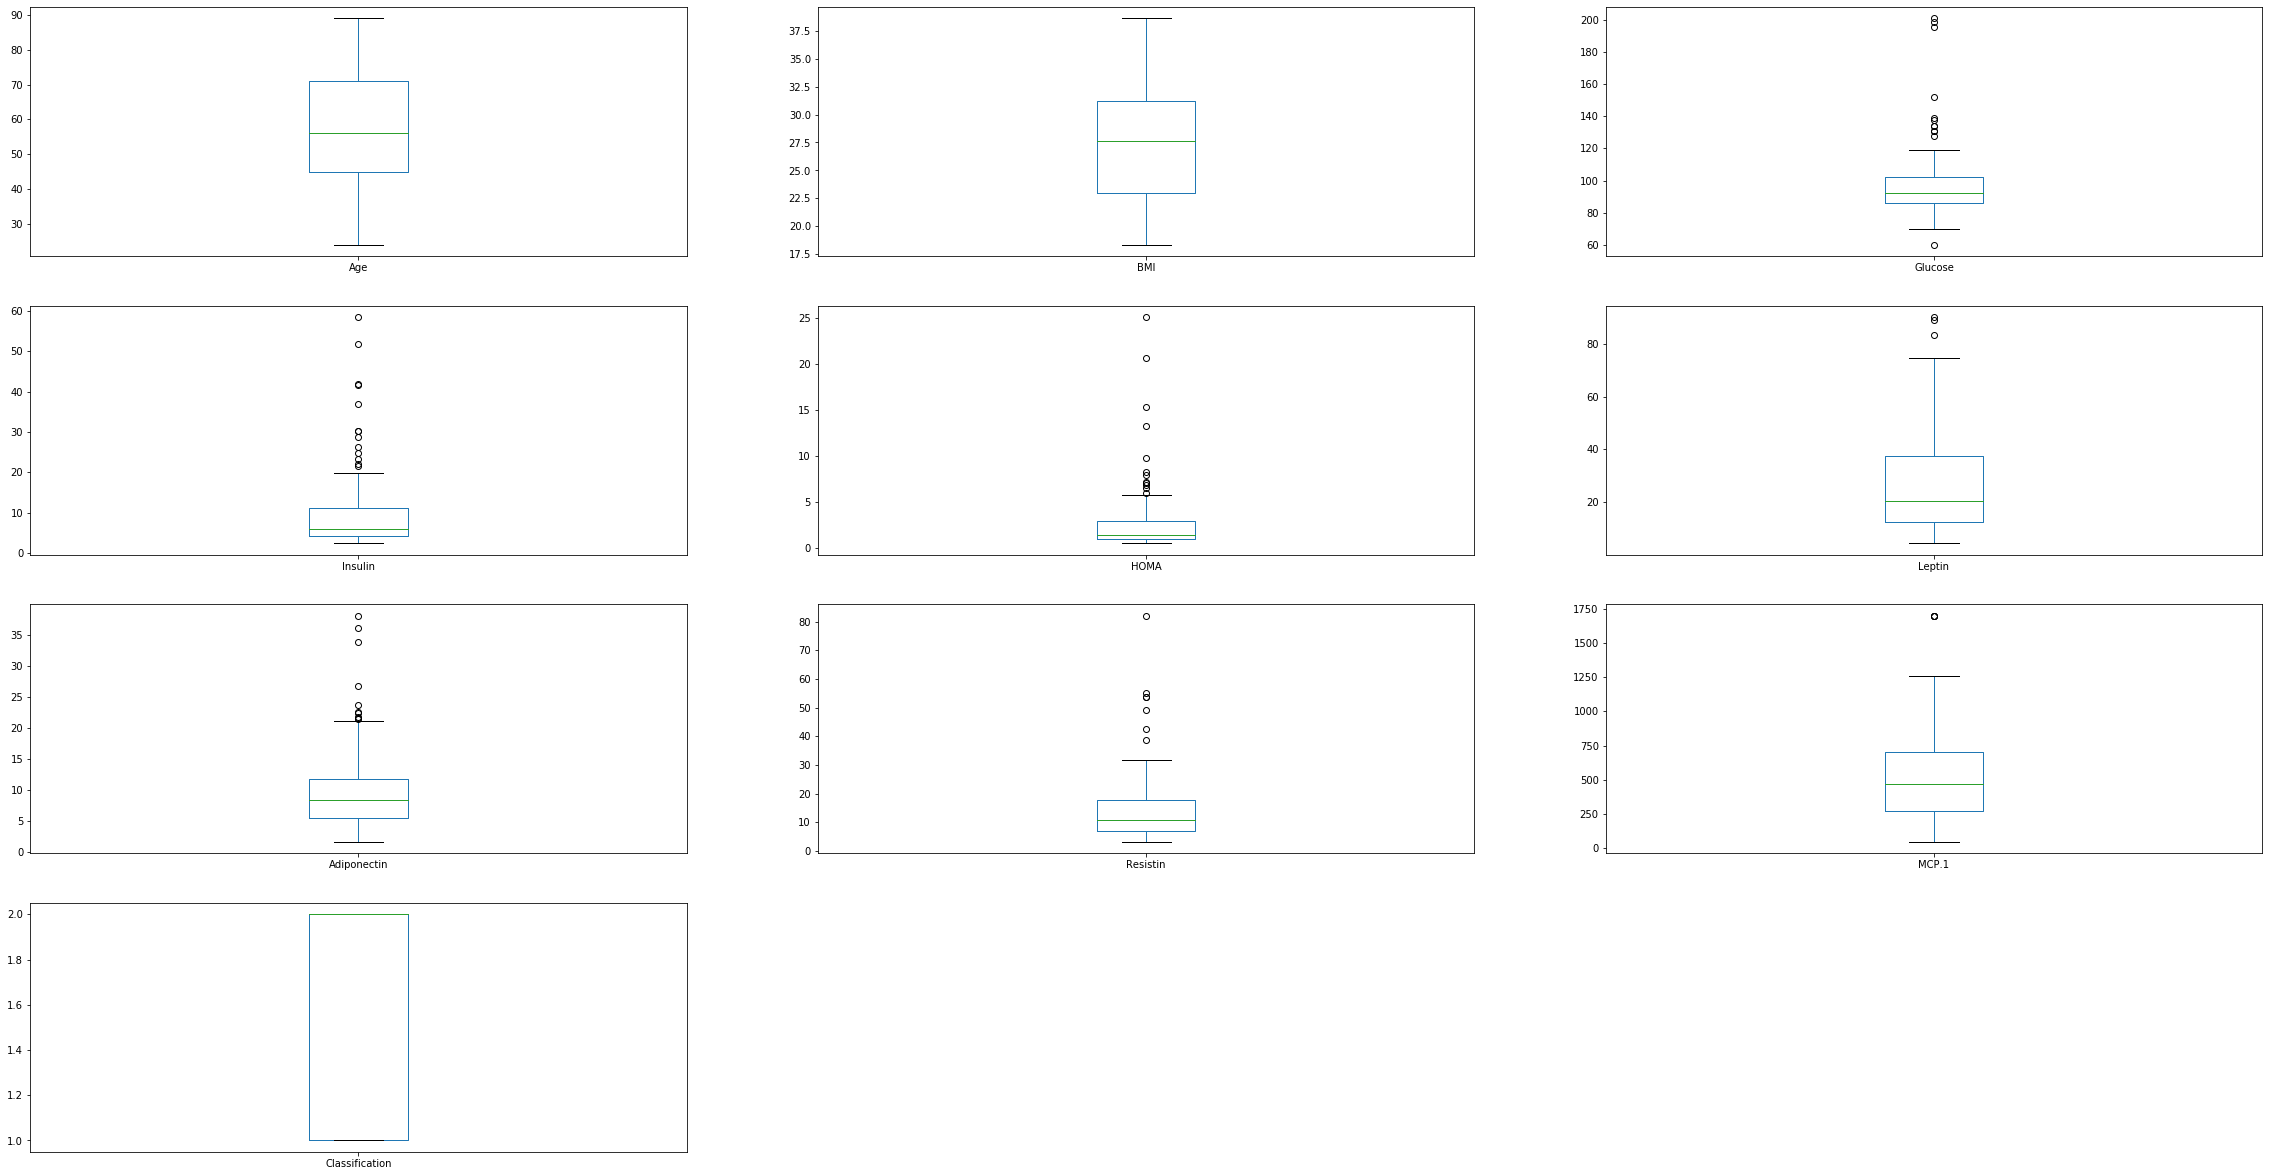

In [298]:
dataset.plot(kind='box', subplots=True, layout=(12,3), sharex=False, sharey=False, figsize=(40,65))

### FEATURE NORMALIZATION
Konsep penting lainnya yang diperlukan untuk mengubah semua fitur ke skala yang sama adalah normalisasi. Hal ini memungkinkan konvergensi yang lebih cepat pada pembelajaran, dan pengaruh yang lebih seragam untuk semua bobot. Dalam hal ini digunakan MinMaxScaler yang mengubah fitur dengan penskalaan setiap fitur ke rentang yang diberikan (menjadi antara 0 dan 1).

In [299]:
scaler= MinMaxScaler()
feature_scaled=scaler.fit_transform(feature)
feature_scaled.shape

(116, 9)

In [300]:
print(label)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2]


### SEQUENTIAL MODEL
Tumpukan lapisan linear ialah Model Sekuensial. Dalam menentukan bentuk masukan, model perlu tahu bentuk masukan apa yang diharapkan. Lapisan pertama dalam model Sequential (dan hanya yang pertama, karena lapisan berikutnya dapat melakukan inferensi bentuk otomatis) perlu menerima informasi tentang bentuk inputnya. Kemudian untuk menambahkan lapisan cukup dengan menambahkan perintah add.

In [301]:
from sklearn.model_selection import train_test_split

In [302]:
feature_train, feature_test, label_train, label_test = train_test_split(
    feature, label, test_size=0.2, random_state=2)

In [303]:
model = Sequential()

In [309]:
model.add(Dense(units= 20, input_dim =9 , activation='relu'))
model.add(Dense(units=10, activation='relu'))
model.add(Dense(units= 1, activation='sigmoid'))

summary() berfungsi untuk menampilkan ringkasan parameter berdasarkan layer dan output shape.

In [310]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_70 (Dense)             (None, 20)                200       
_________________________________________________________________
dense_71 (Dense)             (None, 10)                210       
_________________________________________________________________
dense_72 (Dense)             (None, 9)                 99        
_________________________________________________________________
dense_73 (Dense)             (None, 20)                200       
_________________________________________________________________
dense_74 (Dense)             (None, 10)                210       
_________________________________________________________________
dense_75 (Dense)             (None, 1)                 11        
Total params: 509
Trainable params: 509
Non-trainable params: 0
_________________________________________________________________


C:\Users\Bella Putri\AppData\Local\conda\conda\envs\tensorflow-session\lib\site-packages\keras\engine\training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


compile() berfungsi mengembalikan objek kode Python dari sumber (string normal, string byte, atau objek AST). Dalam hal ini menggunakan optimizer adam dan categorical loss yaitu binary crossentropy.

In [311]:
model.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [312]:
history = model.fit(feature_train, label_train, validation_data=(feature_test, label_test), batch_size=16, 
                         epochs=100)

Train on 92 samples, validate on 24 samples
Epoch 1/100
92/92 [==============================] - 3s 36ms/step - loss: 0.8547 - acc: 0.0109 - val_loss: 0.8346 - val_acc: 0.0000e+00
Epoch 2/100
92/92 [==============================] - 0s 294us/step - loss: 0.8414 - acc: 0.0217 - val_loss: 0.8263 - val_acc: 0.0000e+00
Epoch 3/100
92/92 [==============================] - 0s 966us/step - loss: 0.8274 - acc: 0.0217 - val_loss: 0.8181 - val_acc: 0.0000e+00
Epoch 4/100
92/92 [==============================] - 0s 510us/step - loss: 0.8123 - acc: 0.0543 - val_loss: 0.8106 - val_acc: 0.0000e+00
Epoch 5/100
92/92 [==============================] - 0s 924us/step - loss: 0.7983 - acc: 0.0652 - val_loss: 0.8018 - val_acc: 0.0000e+00
Epoch 6/100
92/92 [==============================] - 0s 516us/step - loss: 0.7881 - acc: 0.0652 - val_loss: 0.7919 - val_acc: 0.0000e+00
Epoch 7/100
92/92 [==============================] - 0s 1ms/step - loss: 0.7771 - acc: 0.0761 - val_loss: 0.7774 - val_acc: 0.0000e+00


Epoch 62/100
92/92 [==============================] - 0s 466us/step - loss: 0.3505 - acc: 0.4239 - val_loss: 0.3869 - val_acc: 0.5417
Epoch 63/100
92/92 [==============================] - 0s 502us/step - loss: 0.3447 - acc: 0.4239 - val_loss: 0.3817 - val_acc: 0.5417
Epoch 64/100
92/92 [==============================] - 0s 379us/step - loss: 0.3390 - acc: 0.4239 - val_loss: 0.3766 - val_acc: 0.5417
Epoch 65/100
92/92 [==============================] - 0s 637us/step - loss: 0.3333 - acc: 0.4239 - val_loss: 0.3715 - val_acc: 0.5417
Epoch 66/100
92/92 [==============================] - 0s 564us/step - loss: 0.3274 - acc: 0.4239 - val_loss: 0.3665 - val_acc: 0.5417
Epoch 67/100
92/92 [==============================] - 0s 634us/step - loss: 0.3217 - acc: 0.4239 - val_loss: 0.3615 - val_acc: 0.5417
Epoch 68/100
92/92 [==============================] - 0s 531us/step - loss: 0.3162 - acc: 0.4239 - val_loss: 0.3565 - val_acc: 0.5417
Epoch 69/100
92/92 [==============================] - 0s 605us

Berikut ini adalah tampilan prediksi data.

In [313]:
predict = model.predict(feature_scaled)
predict

array([[0.594898  ],
       [0.5957948 ],
       [0.5976766 ],
       [0.59708667],
       [0.5965949 ],
       [0.5957624 ],
       [0.59797823],
       [0.5964407 ],
       [0.595925  ],
       [0.5956272 ],
       [0.5941972 ],
       [0.59406286],
       [0.5940469 ],
       [0.5946197 ],
       [0.5945683 ],
       [0.59471345],
       [0.5964648 ],
       [0.5935157 ],
       [0.5956721 ],
       [0.5943213 ],
       [0.5945398 ],
       [0.5941404 ],
       [0.59367245],
       [0.59349966],
       [0.5961514 ],
       [0.59548694],
       [0.5950843 ],
       [0.5945115 ],
       [0.5946307 ],
       [0.59617037],
       [0.5934066 ],
       [0.5944083 ],
       [0.5950993 ],
       [0.5923492 ],
       [0.59470093],
       [0.59416413],
       [0.59456104],
       [0.6001328 ],
       [0.59605116],
       [0.5961175 ],
       [0.5951507 ],
       [0.5940683 ],
       [0.59468985],
       [0.596301  ],
       [0.5954882 ],
       [0.59487695],
       [0.59514683],
       [0.593

### ACCURACY 

In [314]:
acc_testing  = model.evaluate(feature_test, label_test) 
print("\n%s: %.2f%%" % (model.metrics_names[1], acc_testing[1]*100))

24/24 [==============================] - 0s 332us/step

acc: 54.17%


Mencetak nilai akurasi.

In [315]:
print(acc_testing[1])

0.5416666865348816


In [316]:
from sklearn.metrics import confusion_matrix

In [317]:
prediction = model.predict_classes(feature_test)
cm = confusion_matrix(label_test, prediction)
tp = cm[0,0]
tn = cm[1,1]
fp = cm[0,1]
fn = cm[1,0]

Berdasarkan hasil tersebut, didapat confusion matrix sebagai berikut :

In [324]:
print ("Confussion matriks:\n",cm)

Confussion matriks:
 [[13  0]
 [11  0]]


### TRAINING AND TESTING ACCURACY

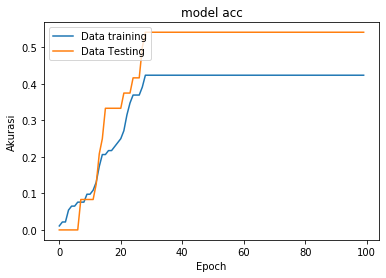

In [322]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model acc')
plt.ylabel('Akurasi')
plt.xlabel('Epoch')
plt.legend(['Data training', 'Data Testing'], loc='upper left')
plt.show()

## TRAINING AND TESTING LOSS

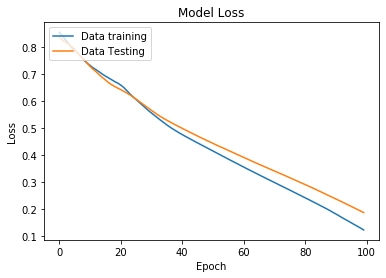

In [323]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Data training', 'Data Testing'], loc='upper left')
plt.show()